# Importing Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the CSV document / COMBINED (Final) Dataset showing three decades of data.

In [31]:
df = pd.read_csv("Tornado_Three_Decades_Semi_Cleaned.csv")

# Reading tail and head to ensure data pulled correctly. The three CSVs were combined manually via OpenOffice / Libre (Copy and paste // created new CSV entirely)

In [32]:
df.head()

,Year,Month,DAY,TIME,STATE,YEAR,MONTH,EVENT_TYPE,SOURCE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH
0,2004,7,24,1900-01-01 14:30:00,NEVADA,2004,July,Tornado,GENERAL PUBLIC,F0,0.1,200.0
1,2004,12,29,1900-01-01 12:10:00,CALIFORNIA,2004,December,Tornado,LAW ENFORCEMENT,F0,0.2,3.0
2,2004,12,9,1900-01-01 05:38:00,MISSISSIPPI,2004,December,Tornado,NWS STORM SURVEY,F0,0.2,50.0
3,2004,12,7,1900-01-01 10:15:00,INDIANA,2004,December,Tornado,NWS STORM SURVEY,F0,1.5,75.0
4,2004,2,27,1900-01-01 23:30:00,HAWAII,2004,February,Tornado,NWS STORM SURVEY,F0,5.0,25.0


In [33]:
df.tail()

,Year,Month,DAY,TIME,STATE,YEAR,MONTH,EVENT_TYPE,SOURCE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH
5135,2024,6,22,1900-01-01 17:02:00,WISCONSIN,2024,June,Tornado,NWS Storm Survey,EF0,5.57,75.0
5136,2024,6,22,1900-01-01 19:22:00,WISCONSIN,2024,June,Tornado,NWS Storm Survey,EF1,5.26,100.0
5137,2024,6,22,1900-01-01 19:42:00,WISCONSIN,2024,June,Tornado,NWS Storm Survey,EF0,1.41,40.0
5138,2024,6,28,1900-01-01 20:02:00,MISSOURI,2024,June,Tornado,Emergency Manager,EFU,0.15,20.0
5139,2024,10,9,1900-01-01 11:01:00,FLORIDA,2024,October,Tornado,NWS Storm Survey,EF1,0.90,100.0


# Looks like the ID column (Column 1) got messed up when combining CSVs. 
Most likely due to each CSV having their own unique data ID... we are going to reset this

In [ ]:

df.reset_index(drop=True, inplace=True) #RESET INDEX
df.insert(0, 'TORNADO_ID', df.index + 1) #INSERT NEW INDEX AT ROW 0, Column name is TORNADO_ID


In [35]:
#Checking again
df.head()

,TORNADO_ID,Year,Month,DAY,TIME,STATE,YEAR,MONTH,EVENT_TYPE,SOURCE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH
0,1,2004,7,24,1900-01-01 14:30:00,NEVADA,2004,July,Tornado,GENERAL PUBLIC,F0,0.1,200.0
1,2,2004,12,29,1900-01-01 12:10:00,CALIFORNIA,2004,December,Tornado,LAW ENFORCEMENT,F0,0.2,3.0
2,3,2004,12,9,1900-01-01 05:38:00,MISSISSIPPI,2004,December,Tornado,NWS STORM SURVEY,F0,0.2,50.0
3,4,2004,12,7,1900-01-01 10:15:00,INDIANA,2004,December,Tornado,NWS STORM SURVEY,F0,1.5,75.0
4,5,2004,2,27,1900-01-01 23:30:00,HAWAII,2004,February,Tornado,NWS STORM SURVEY,F0,5.0,25.0


In [36]:
df.tail()

,TORNADO_ID,Year,Month,DAY,TIME,STATE,YEAR,MONTH,EVENT_TYPE,SOURCE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH
5135,5136,2024,6,22,1900-01-01 17:02:00,WISCONSIN,2024,June,Tornado,NWS Storm Survey,EF0,5.57,75.0
5136,5137,2024,6,22,1900-01-01 19:22:00,WISCONSIN,2024,June,Tornado,NWS Storm Survey,EF1,5.26,100.0
5137,5138,2024,6,22,1900-01-01 19:42:00,WISCONSIN,2024,June,Tornado,NWS Storm Survey,EF0,1.41,40.0
5138,5139,2024,6,28,1900-01-01 20:02:00,MISSOURI,2024,June,Tornado,Emergency Manager,EFU,0.15,20.0
5139,5140,2024,10,9,1900-01-01 11:01:00,FLORIDA,2024,October,Tornado,NWS Storm Survey,EF1,0.90,100.0


In [ ]:
#Seems to be two columns ID's >> dropping the tornado ID column.
df.drop(df.columns[0], axis=1, inplace=True)


In [38]:
df.head()

,Year,Month,DAY,TIME,STATE,YEAR,MONTH,EVENT_TYPE,SOURCE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH
0,2004,7,24,1900-01-01 14:30:00,NEVADA,2004,July,Tornado,GENERAL PUBLIC,F0,0.1,200.0
1,2004,12,29,1900-01-01 12:10:00,CALIFORNIA,2004,December,Tornado,LAW ENFORCEMENT,F0,0.2,3.0
2,2004,12,9,1900-01-01 05:38:00,MISSISSIPPI,2004,December,Tornado,NWS STORM SURVEY,F0,0.2,50.0
3,2004,12,7,1900-01-01 10:15:00,INDIANA,2004,December,Tornado,NWS STORM SURVEY,F0,1.5,75.0
4,2004,2,27,1900-01-01 23:30:00,HAWAII,2004,February,Tornado,NWS STORM SURVEY,F0,5.0,25.0


In [39]:
df.tail()

,Year,Month,DAY,TIME,STATE,YEAR,MONTH,EVENT_TYPE,SOURCE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH
5135,2024,6,22,1900-01-01 17:02:00,WISCONSIN,2024,June,Tornado,NWS Storm Survey,EF0,5.57,75.0
5136,2024,6,22,1900-01-01 19:22:00,WISCONSIN,2024,June,Tornado,NWS Storm Survey,EF1,5.26,100.0
5137,2024,6,22,1900-01-01 19:42:00,WISCONSIN,2024,June,Tornado,NWS Storm Survey,EF0,1.41,40.0
5138,2024,6,28,1900-01-01 20:02:00,MISSOURI,2024,June,Tornado,Emergency Manager,EFU,0.15,20.0
5139,2024,10,9,1900-01-01 11:01:00,FLORIDA,2024,October,Tornado,NWS Storm Survey,EF1,0.90,100.0


# Exploratory Data Analysis!
Now that data is combined, let's look at some overall trends.

In [40]:
df.groupby('Month')['TOR_LENGTH'].mean()

Month
1     3.443559
2     3.447328
3     3.122039
4     3.584092
5     3.052377
6     2.144706
7     3.753838
8     2.240487
9     2.626096
10    3.511423
11    3.570247
12    4.275961
Name: TOR_LENGTH, dtype: float64

In [41]:
ef_counts_month = df.groupby(['MONTH', 'TOR_F_SCALE']).size()
pd.set_option('display.max_rows', None) #Display max rows to none allows us to see all of the data, otherwise pandas will limit what we can see...
print(ef_counts_month)


MONTH      TOR_F_SCALE
April      EF0            158
           EF1            270
           EF2             78
           EF3             22
           EF4              5
           EFU             48
           F0              97
           F1              32
           F2               5
           F3               1
August     EF0             98
           EF1             48
           EF2              4
           EF3              1
           EFU             18
           F0             140
           F1              34
           F2               6
December   EF0             69
           EF1             89
           EF2              6
           EF3              5
           EFU              3
           F0              17
           F1               8
           F2               5
           F3               1
February   EF0             41
           EF1             48
           EF2             13
           EFU              4
           F0               6
           F1    

# Problem #1 > Two different tornado scales being used by the CSVs.

In [42]:
#This is a problem for data analysis as the enchanced fujita scale rates tornadoes differently based on Wind speed, damage, etc...

#So we will need to use ONE scale or drop this column entirely and not rely on it for analysis... an F5 tornado is NOT the same as an EF5

#We need to look at what were attempting to do going forward. Our MAIN question here is tracking tornado alley... if it has shifted across the United States

#This column is a categorical, and we still have other columns to rely upon for more detailed information about the tornados.

#I am electing to do a rough conversion from the older F scale into the new EF 5 scale... the scale is pretty 1 to 1 until we reach EF3 and above.

#This will be taken into account further along...

# Creating a dictionary for conversion.

In [43]:
f_to_ef = {'F0':'EF0', 'F1':'EF1', 'F2':'EF2', 'F3':'EF3', 'F4':'EF4', 'F5':'EF5'}
df['TOR_SCALE_UNIFIED'] = df['TOR_F_SCALE'].replace(f_to_ef)


In [44]:
df.head()

,Year,Month,DAY,TIME,STATE,YEAR,MONTH,EVENT_TYPE,SOURCE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_SCALE_UNIFIED
0,2004,7,24,1900-01-01 14:30:00,NEVADA,2004,July,Tornado,GENERAL PUBLIC,F0,0.1,200.0,EF0
1,2004,12,29,1900-01-01 12:10:00,CALIFORNIA,2004,December,Tornado,LAW ENFORCEMENT,F0,0.2,3.0,EF0
2,2004,12,9,1900-01-01 05:38:00,MISSISSIPPI,2004,December,Tornado,NWS STORM SURVEY,F0,0.2,50.0,EF0
3,2004,12,7,1900-01-01 10:15:00,INDIANA,2004,December,Tornado,NWS STORM SURVEY,F0,1.5,75.0,EF0
4,2004,2,27,1900-01-01 23:30:00,HAWAII,2004,February,Tornado,NWS STORM SURVEY,F0,5.0,25.0,EF0


In [45]:
ef_counts_month = df.groupby(['MONTH', 'TOR_SCALE_UNIFIED']).size() #NEW COLUMN USING COMBINED EF SCALE
pd.set_option('display.max_rows', None)
print(ef_counts_month)

MONTH      TOR_SCALE_UNIFIED
April      EF0                  255
           EF1                  302
           EF2                   83
           EF3                   23
           EF4                    5
           EFU                   48
August     EF0                  238
           EF1                   82
           EF2                   10
           EF3                    1
           EFU                   18
December   EF0                   86
           EF1                   97
           EF2                   11
           EF3                    6
           EFU                    3
February   EF0                   47
           EF1                   51
           EF2                   14
           EFU                    4
January    EF0                   26
           EF1                   24
           EF2                    7
           EF3                    1
           EFU                    1
July       EF0                  232
           EF1                  181

# Problem #2 > "EFU"
We have "EFU" which stands for Unknown. These are tornadoes that aren't assigned to the EF scale. Possible reasons due to lack of information (damage to buildings) or lack of direct observation (Such as a radar spotted or radar).

Creating another new dictionary... labeling these tornadoes "unknown" for clarity.

In [46]:
df['TOR_SCALE_UNIFIED'] = df['TOR_SCALE_UNIFIED'].replace({'EFU': 'Unknown'})
ef_counts_month = df.groupby(['MONTH', 'TOR_SCALE_UNIFIED']).size()
pd.set_option('display.max_rows', None)
print(ef_counts_month)

MONTH      TOR_SCALE_UNIFIED
April      EF0                  255
           EF1                  302
           EF2                   83
           EF3                   23
           EF4                    5
           Unknown               48
August     EF0                  238
           EF1                   82
           EF2                   10
           EF3                    1
           Unknown               18
December   EF0                   86
           EF1                   97
           EF2                   11
           EF3                    6
           Unknown                3
February   EF0                   47
           EF1                   51
           EF2                   14
           Unknown                4
January    EF0                   26
           EF1                   24
           EF2                    7
           EF3                    1
           Unknown                1
July       EF0                  232
           EF1                  181

In [47]:
#The above data is telling us that the EF scale isn't something we should rely on heavily for tracking the strength of tornados, we can still use it but we should rely on other columns (that use numerical data) for a more reliable analysis.

In [48]:
df.head()
#Lets look at something else this time, perhaps how many tornados per state.

,Year,Month,DAY,TIME,STATE,YEAR,MONTH,EVENT_TYPE,SOURCE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_SCALE_UNIFIED
0,2004,7,24,1900-01-01 14:30:00,NEVADA,2004,July,Tornado,GENERAL PUBLIC,F0,0.1,200.0,EF0
1,2004,12,29,1900-01-01 12:10:00,CALIFORNIA,2004,December,Tornado,LAW ENFORCEMENT,F0,0.2,3.0,EF0
2,2004,12,9,1900-01-01 05:38:00,MISSISSIPPI,2004,December,Tornado,NWS STORM SURVEY,F0,0.2,50.0,EF0
3,2004,12,7,1900-01-01 10:15:00,INDIANA,2004,December,Tornado,NWS STORM SURVEY,F0,1.5,75.0,EF0
4,2004,2,27,1900-01-01 23:30:00,HAWAII,2004,February,Tornado,NWS STORM SURVEY,F0,5.0,25.0,EF0


In [49]:
tornado_per_state = df.groupby(['YEAR', 'STATE']).size()
pd.set_option('display.max_rows', None)
print(tornado_per_state)

YEAR  STATE         
2004  ALABAMA            65
      ALASKA              2
      ARIZONA             3
      ARKANSAS           58
      CALIFORNIA         10
      COLORADO           84
      DELAWARE            2
      FLORIDA           107
      GEORGIA            46
      HAWAII              3
      IDAHO               5
      ILLINOIS           87
      INDIANA            53
      IOWA              124
      KANSAS            125
      KENTUCKY           23
      LOUISIANA          30
      MAINE               1
      MARYLAND           21
      MASSACHUSETTS       2
      MICHIGAN           24
      MINNESOTA          61
      MISSISSIPPI        69
      MISSOURI           80
      MONTANA             7
      NEBRASKA          116
      NEVADA              5
      NEW HAMPSHIRE       1
      NEW JERSEY          2
      NEW MEXICO         11
      NEW YORK            9
      NORTH CAROLINA     70
      NORTH DAKOTA       50
      OHIO                9
      OKLAHOMA           65

In [50]:
#That's a lot of data! But if the goal is looking at tornados shifting east, let's pick an eastward state not in the traditional tornado alley, such as Kentucky.
print(df[df['STATE'] == 'KENTUCKY'].groupby('YEAR').size())


YEAR
2004    23
2014    29
2024    66
dtype: int64


In [51]:
#Interesting, this is telling us that there are MORE tornados over the most recent decade in KY compared to two decades ago. More than double!

#But how does this compare against the overall average?

# Let's using some graphics to look at this data.

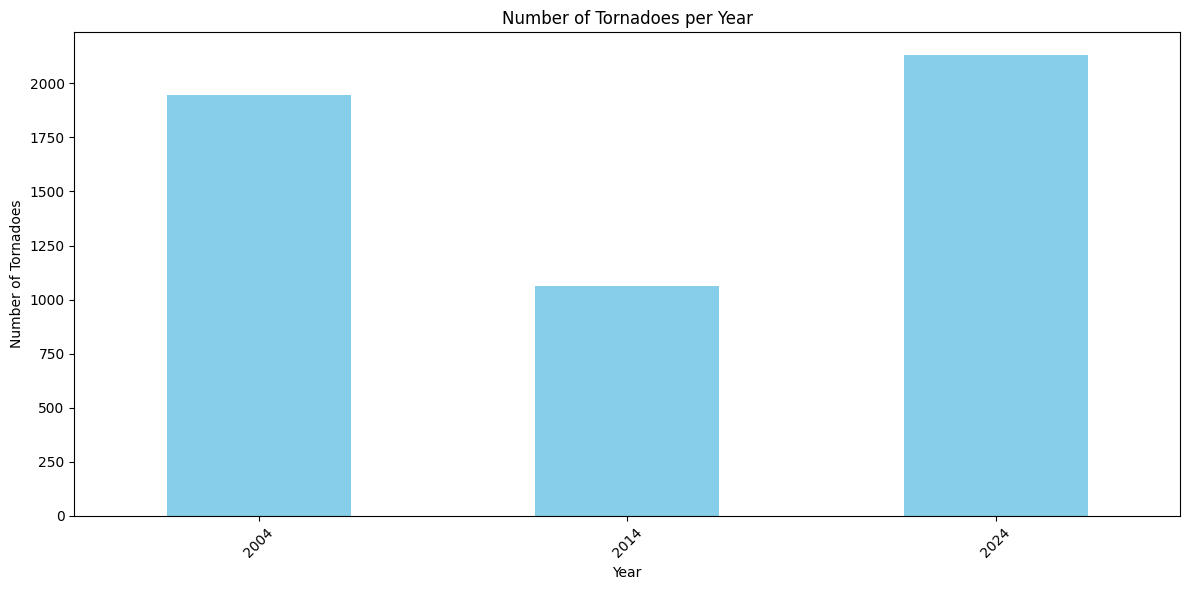

In [52]:
#Creating a bar graph showing Number of Tornadoes per year
tornado_per_year = df.groupby('YEAR').size()

plt.figure(figsize=(12,6))
tornado_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Tornadoes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# The number of tornados has slightly increased in 2024 compared to 2004, but look at the huge dip in 2014...

In [53]:
#Pulling columns names again to make it easier to create future graphs.
df.columns

Index(['Year', 'Month', 'DAY', 'TIME', 'STATE', 'YEAR', 'MONTH', 'EVENT_TYPE',
       'SOURCE', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH',
       'TOR_SCALE_UNIFIED'],
      dtype='object')

# Now let's analyze the average tornado length per year

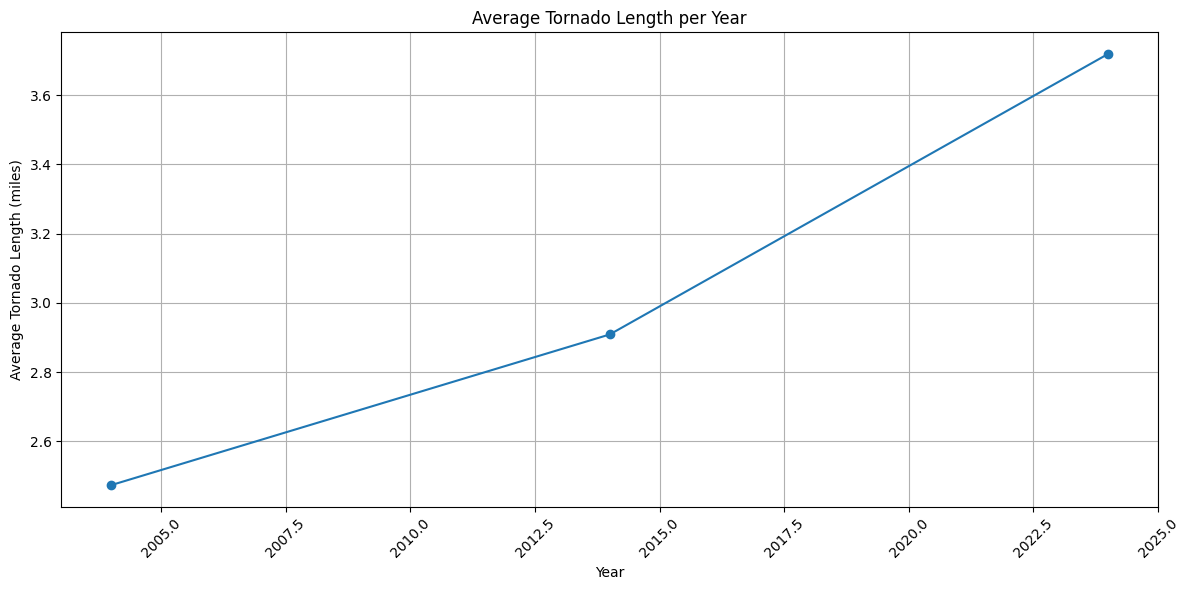

In [54]:
plt.figure(figsize=(12,6))

# Group by year and calculate average tornado length
avg_length_per_year = df.groupby('YEAR')['TOR_LENGTH'].mean()

plt.plot(avg_length_per_year.index, avg_length_per_year.values, marker='o')
plt.title('Average Tornado Length per Year')
plt.xlabel('Year')
plt.ylabel('Average Tornado Length (miles)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# The graph above shows us that tornado length is steadily increasing since the data starts in 2004, growing almost a whole mile since 2004...
Let's look at KY specifically again and see if this coorelates to an Eastern state.

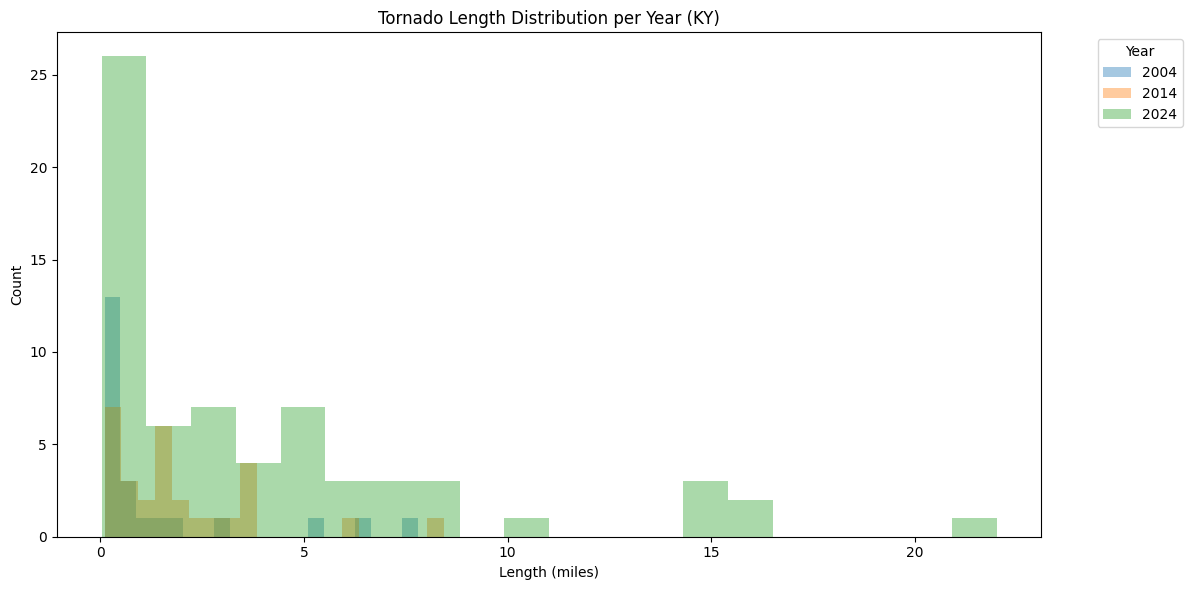

In [55]:
df_ky = df[df['STATE'] == 'KENTUCKY'] # # Filter for Kentucky ONLY
years = sorted(df_ky['YEAR'].unique()) #Sorting list of years notice the UNIQUE

plt.figure(figsize=(12,6))

for year in years:
    data = df_ky[df_ky['YEAR'] == year]['TOR_LENGTH'] # Plot overlaid histograms per year
    plt.hist(data, bins=20, alpha=0.4, label=str(year))

plt.title('Tornado Length Distribution per Year (KY)')
plt.xlabel('Length (miles)')
plt.ylabel('Count')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Histogram above shows that in KY, Tornado Length seems to be getting larger in later decades.